- $\mathbf{X} \in \mathbb{R} ^ {N \times m}$: matriz de caracteristicas.
- $N \in \mathbb{Z}$: numero de muestras o ejemplos.
- $m \in \mathbb{Z}$: numero de caracteristicas o variables.
- $\mathbf{y} \in \mathbb{R} ^ {N \times C}$: vector de etiquetas, variable objetivo.
- $\tilde{\mathbf{y}} \in \mathbb{R} ^ {N \times C}$: predicciones, estimacion.
- $C \in \mathbb{R}$: numero de variables a estimar.

$$
\tilde{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w}
$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
from typing import Tuple
plt.style.use("ggplot")

In [7]:
edad = np.random.uniform(0, 18, size=(1000, 1))
estatura = 35 + edad * 135 / 18 + np.random.normal(loc=0, scale=10, size=(1000, 1))

[Text(0.5, 0, 'Edad [Anios]'), Text(0, 0.5, 'Estatura [cm]')]

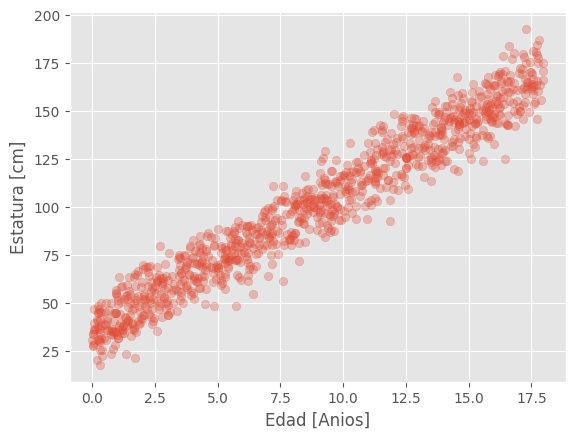

In [8]:
fig, ax = plt.subplots()
ax.scatter(edad, estatura, alpha=0.3)
ax.set(xlabel="Edad [Anios]", ylabel="Estatura [cm]")

$$
estatura = edad \cdot m + b
$$

$$
\mathcal{L} = \frac{1}{N}\sum_{i}^N(y_i - \tilde{y_i}) ^ 2
$$

In [11]:
def mse(y: ArrayLike, y_pred: ArrayLike) -> float:
    return ((y - y_pred) ** 2).mean()

In [12]:
def predict_estatura(edad: ArrayLike, m: float, b: float) -> ArrayLike:
    return edad * m + b

In [31]:
m = np.random.uniform(low=-50, high=50)
b = np.random.uniform(low=0, high=100)
print(m, b)

32.45963932623161 19.229726752555187


In [32]:
edad_range = np.linspace(0, 18, 100)
y_pred = predict_estatura(edad_range, m, b)

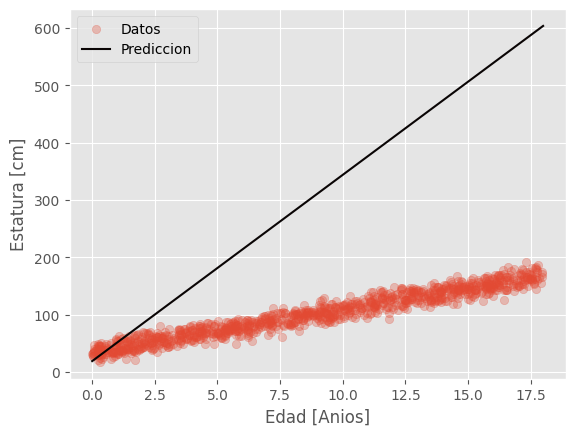

In [33]:
fig, ax = plt.subplots()
ax.scatter(edad, estatura, alpha=0.3, label="Datos")
ax.plot(edad_range, y_pred, label="Prediccion", color="#0A0505")
ax.set(xlabel="Edad [Anios]", ylabel="Estatura [cm]")
ax.legend()

In [34]:
y_pred = predict_estatura(edad, m, b)
mse(estatura, y_pred)

59507.37428089747

In [46]:
def random_search(n_iters: int) -> Tuple[float, float]:
    best_loss = np.inf
    best_m, best_b = (0, 0)
    for _ in range(n_iters):
        m, b = np.random.uniform(low=-50, high=50, size=(2, ))
        y_pred = predict_estatura(edad, m, b)
        cur_loss = mse(estatura, y_pred)
        if cur_loss < best_loss:
            best_loss = cur_loss
            best_m, best_b = m, b
    return best_m, best_b

In [89]:
m, b = random_search(100)

In [90]:
m, b

(4.588850091399308, 40.705552984002026)

In [91]:
edad_range = np.linspace(0, 18, 100)
y_pred = predict_estatura(edad_range, m, b)

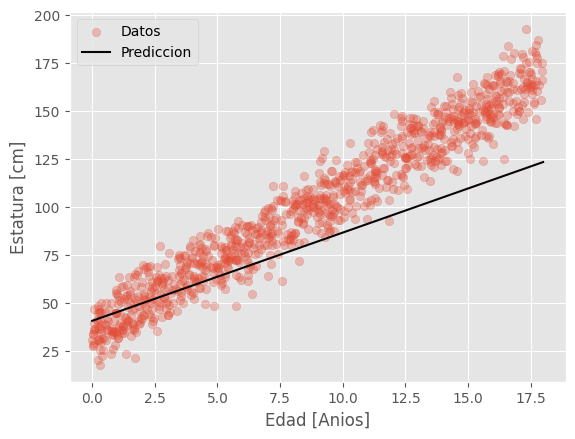

In [92]:
fig, ax = plt.subplots()
ax.scatter(edad, estatura, alpha=0.3, label="Datos")
ax.plot(edad_range, y_pred, label="Prediccion", color="#0A0505")
ax.set(xlabel="Edad [Anios]", ylabel="Estatura [cm]")
ax.legend()

In [93]:
def hill_climbing(n_iters: int) -> Tuple[float, float]:
    best_loss = np.inf
    best_m, best_b = np.random.uniform(low=-50, high=50, size=(2, ))
    for _ in range(n_iters):
        delta_m, delta_b = np.random.normal(size=(2, ))
        m, b = best_m + delta_m, best_b + delta_b
        y_pred = predict_estatura(edad, m, b)
        cur_loss = mse(estatura, y_pred)
        if cur_loss < best_loss:
            best_loss = cur_loss
            best_m, best_b = m, b
    return best_m, best_b

In [94]:
m, b = hill_climbing(100)

In [95]:
edad_range = np.linspace(0, 18, 100)
y_pred = predict_estatura(edad_range, m, b)

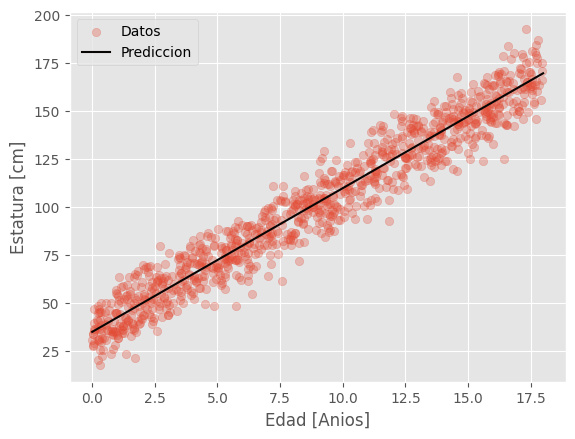

In [96]:
fig, ax = plt.subplots()
ax.scatter(edad, estatura, alpha=0.3, label="Datos")
ax.plot(edad_range, y_pred, label="Prediccion", color="#0A0505")
ax.set(xlabel="Edad [Anios]", ylabel="Estatura [cm]")
ax.legend()

In [97]:
def f(x: float) -> float:
    return (x - 2) ** 2 + 10

$$
f(x) = (x - 2) ^ 2 + 10\\
\frac{df}{dx} = 2 (x - 2)\\
0 = 2 (x - 2)\\
x = 2
$$

In [98]:
def hill_climbing(n_iters: int) -> Tuple[float, float]:
    best_loss = np.inf
    best_x = np.random.uniform()
    for _ in range(n_iters):
        delta_x = np.random.normal()
        x = best_x + delta_x
        cur_loss = f(x)
        if cur_loss < best_loss:
            best_loss = cur_loss
            best_x = x
    return best_x

In [99]:
min_x = hill_climbing(100)

In [100]:
min_x

2.007161559029523